In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
# Step 1.1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Concept of AI/student.csv')


In [8]:
# Step 1.2: Understand the data
# First and last 5 rows
print("First 5 rows of the dataset:")
print(data.head())

print("\nLast 5 rows of the dataset:")
print(data.tail())

# Dataset info
print("\nDataset Info:")
print(data.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


First 5 rows of the dataset:
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Last 5 rows of the dataset:
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

Descriptive Statistics:
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60

In [11]:
#Step 1.3: Split Dataset into Features (X) and Target (Y)
# Features and target
X = data[['Math', 'Reading']].values
Y = data['Writing'].values

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (1000, 2)
Shape of Y: (1000,)


In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Confirm split sizes
print("Training set size:", X_train.shape, Y_train.shape)
print("Test set size:", X_test.shape, Y_test.shape)


Training set size: (800, 2) (800,)
Test set size: (200, 2) (200,)


In [12]:
# Define the cost function
def cost_function(X, Y, W):
    """
    Calculate the Mean Squared Error (MSE) cost function.

    Parameters:
    X: Feature matrix (numpy.ndarray)
    Y: Target vector (numpy.ndarray)
    W: Weight vector (numpy.ndarray)

    Returns:
    cost: Mean Squared Error value
    """
    # Number of samples
    n = len(Y)

    # Predicted values
    Y_pred = np.dot(X, W)

    # Mean Squared Error
    cost = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
    return cost

# Example Test Case
# Feature matrix (2 features + bias column for intercept)
X_test = np.array([[1, 2], [3, 4], [5, 6]])  # Example features
Y_test = np.array([3, 7, 11])  # Example targets
W_test = np.array([1, 1])  # Example weights

# Calculate cost
cost = cost_function(X_test, Y_test, W_test)
print("Cost function output:", cost)

# Verify expected output (should be 0 for this test case)
if cost == 0:
    print("Cost function is correct. Proceed further.")
else:
    print("Something went wrong. Recheck your implementation.")

Cost function output: 0.0
Cost function is correct. Proceed further.


In [13]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize the parameters of a linear regression model.
    Parameters:
    X (numpy.ndarray): Feature matrix (m x n)
    Y (numpy.ndarray): Target vector (m x 1)
    W (numpy.ndarray): Initial weights (n x 1)
    alpha (float): Learning rate
    iterations (int): Number of iterations for gradient descent
    Returns:
    W: Updated weights (numpy.ndarray)
    cost_history: List of cost values over iterations
    """
    n = len(Y)  # Number of samples
    cost_history = []  # To store the cost at each iteration

    for _ in range(iterations):
        # Step 1: Calculate predictions
        Y_pred = np.dot(X, W)

        # Step 2: Calculate the loss
        loss = Y_pred - Y

        # Step 3: Compute the gradient
        gradient = (1 / n) * np.dot(X.T, loss)

        # Step 4: Update weights
        W -= alpha * gradient

        # Step 5: Calculate and record the cost
        cost = cost_function(X, Y, W)
        cost_history.append(cost)

    return W, cost_history


In [14]:
# Example data
np.random.seed(42)  # For reproducibility
X_test = np.random.rand(100, 2)  # 100 samples, 2 features
Y_test = np.random.rand(100)  # Target values
W_test = np.zeros(X_test.shape[1])  # Initialize weights to zeros

# Gradient Descent Parameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Perform Gradient Descent
W_optimized, cost_history = gradient_descent(X_test, Y_test, W_test, alpha, iterations)

# Output results
print("Optimized Weights:", W_optimized)
print("First 10 Costs:", cost_history[:10])


Optimized Weights: [0.44944301 0.44505777]
First 10 Costs: [0.17535009737483023, 0.1741391153521301, 0.17294146083870834, 0.17175698715812832, 0.17058554924820693, 0.16942700364324886, 0.1682812084564762, 0.16714802336265158, 0.16602730958089285, 0.1649189298576766]


In [14]:
def rmse(Y, Y_pred):
    """
    Calculate Root Mean Square Error.
    """
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    """
    Calculate R-squared (Coefficient of Determination).
    """
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total Sum of Squares
    ss_res = np.sum((Y - Y_pred) ** 2)      # Residual Sum of Squares
    return 1 - (ss_res / ss_tot)



In [18]:
# Example predictions (replace with your model's predictions)
Y_train_pred = np.dot(X_train, W_optimized)
Y_test_pred = np.dot(X_test, W_optimized)

# Define rmse function before using it.
def rmse(Y, Y_pred):
    """
    Calculate Root Mean Square Error.
    """
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    """
    Calculate R-squared (Coefficient of Determination).
    """
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total Sum of Squares
    ss_res = np.sum((Y - Y_pred) ** 2)      # Residual Sum of Squares
    return 1 - (ss_res / ss_tot)

# Calculate RMSE and R² for training and test sets
print("Training RMSE:", rmse(Y_train, Y_train_pred))
print("Test RMSE:", rmse(Y_test, Y_test_pred))

print("Training R²:", r2(Y_train, Y_train_pred))
print("Test R²:", r2(Y_test, Y_test_pred))

Training RMSE: 9.468227686637444
Test RMSE: 9.595683828652112
Training R²: 0.6059202168535917
Test R²: 0.6321591538621264


In [22]:
def main():
    # Step 1: Load the dataset
    data = pd.read_csv('/content/drive/MyDrive/Concept of AI/student.csv')

    # Step 2: Split data into features (X) and target (Y)
    X = data[['Math', 'Reading']].values
    Y = data['Writing'].values

    # Step 3: Split data into training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Step 4: Initialize weights, learning rate, and iterations
    W = np.zeros(X_train.shape[1])  # Initialize weights to zeros
    alpha = 0.01  # Learning rate
    iterations = 1000  # Number of iterations

    # Step 5: Perform gradient descent
    W_optimized, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Step 6: Make predictions on training and test sets
    Y_train_pred = np.dot(X_train, W_optimized)
    Y_test_pred = np.dot(X_test, W_optimized)

    # Step 7: Evaluate the model using RMSE and R²
    train_rmse = rmse(Y_train, Y_train_pred)
    test_rmse = rmse(Y_test, Y_test_pred)
    train_r2 = r2(Y_train, Y_train_pred)
    test_r2 = r2(Y_test, Y_test_pred)

    # Step 8: Output results
    print("Final Weights:", W_optimized)
    print("Training RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    print("Training R²:", train_r2)
    print("Test R²:", test_r2)

# Execute the main function
if __name__ == "__main__":
    main()


Final Weights: [nan nan]
Training RMSE: nan
Test RMSE: nan
Training R²: nan
Test R²: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-12-d0f14d5cdca6>:21: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
<ipython-input-13-9d782c874ba1>:28: RuntimeWarning: invalid value encountered in subtract
  W -= alpha * gradient


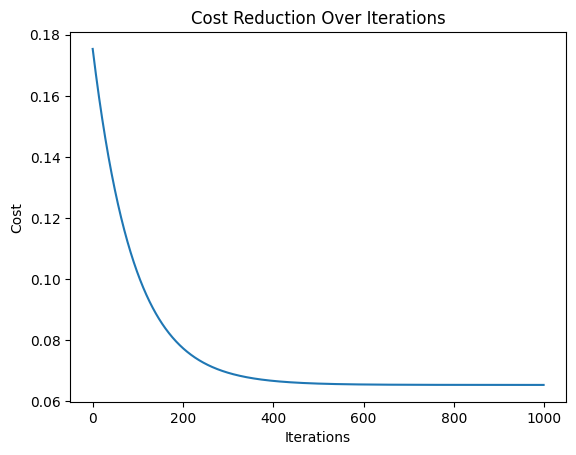

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.show()
